### Importing libraries

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

### Read Dataset

In [5]:
df = pd.read_csv(r"C:\Users\saura\Downloads\CarsPrice.csv")

In [6]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [7]:
df.shape

(19820, 18)

### Summery of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [10]:
df[['year','age','engine']] = df[['year','age','engine']].astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  int32  
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  int32  
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  int32  
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

### Checking for the null values

In [13]:
df.isna().sum()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5                   0
>5                  0
dtype: int64

### How data mathematically looks?

In [15]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
count,19820.000000,19820.000000,1.982000e+04,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000,19820.000000
mean,6.585509,2014.561453,5.815856e+04,19.503402,1475.701060,98.122907,8.438547,0.390666,0.009586,0.492583,0.000404,0.003229,0.487841,0.802674,0.835015,0.152825
std,4.847364,3.196636,5.171563e+04,4.297784,518.571222,44.761727,3.196636,0.487912,0.097442,0.499958,0.020087,0.056734,0.499865,0.397990,0.371176,0.359828
min,0.300000,1992.000000,1.000000e+02,4.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.410000,2013.000000,3.100000e+04,16.950000,1197.000000,73.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,5.200000,2015.000000,5.200000e+04,19.300000,1248.000000,86.800000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,20.902500,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There the 2 categorical series 

### Checking for Outliers

In [18]:
df_num = df.drop(df.select_dtypes('object'), axis=1)

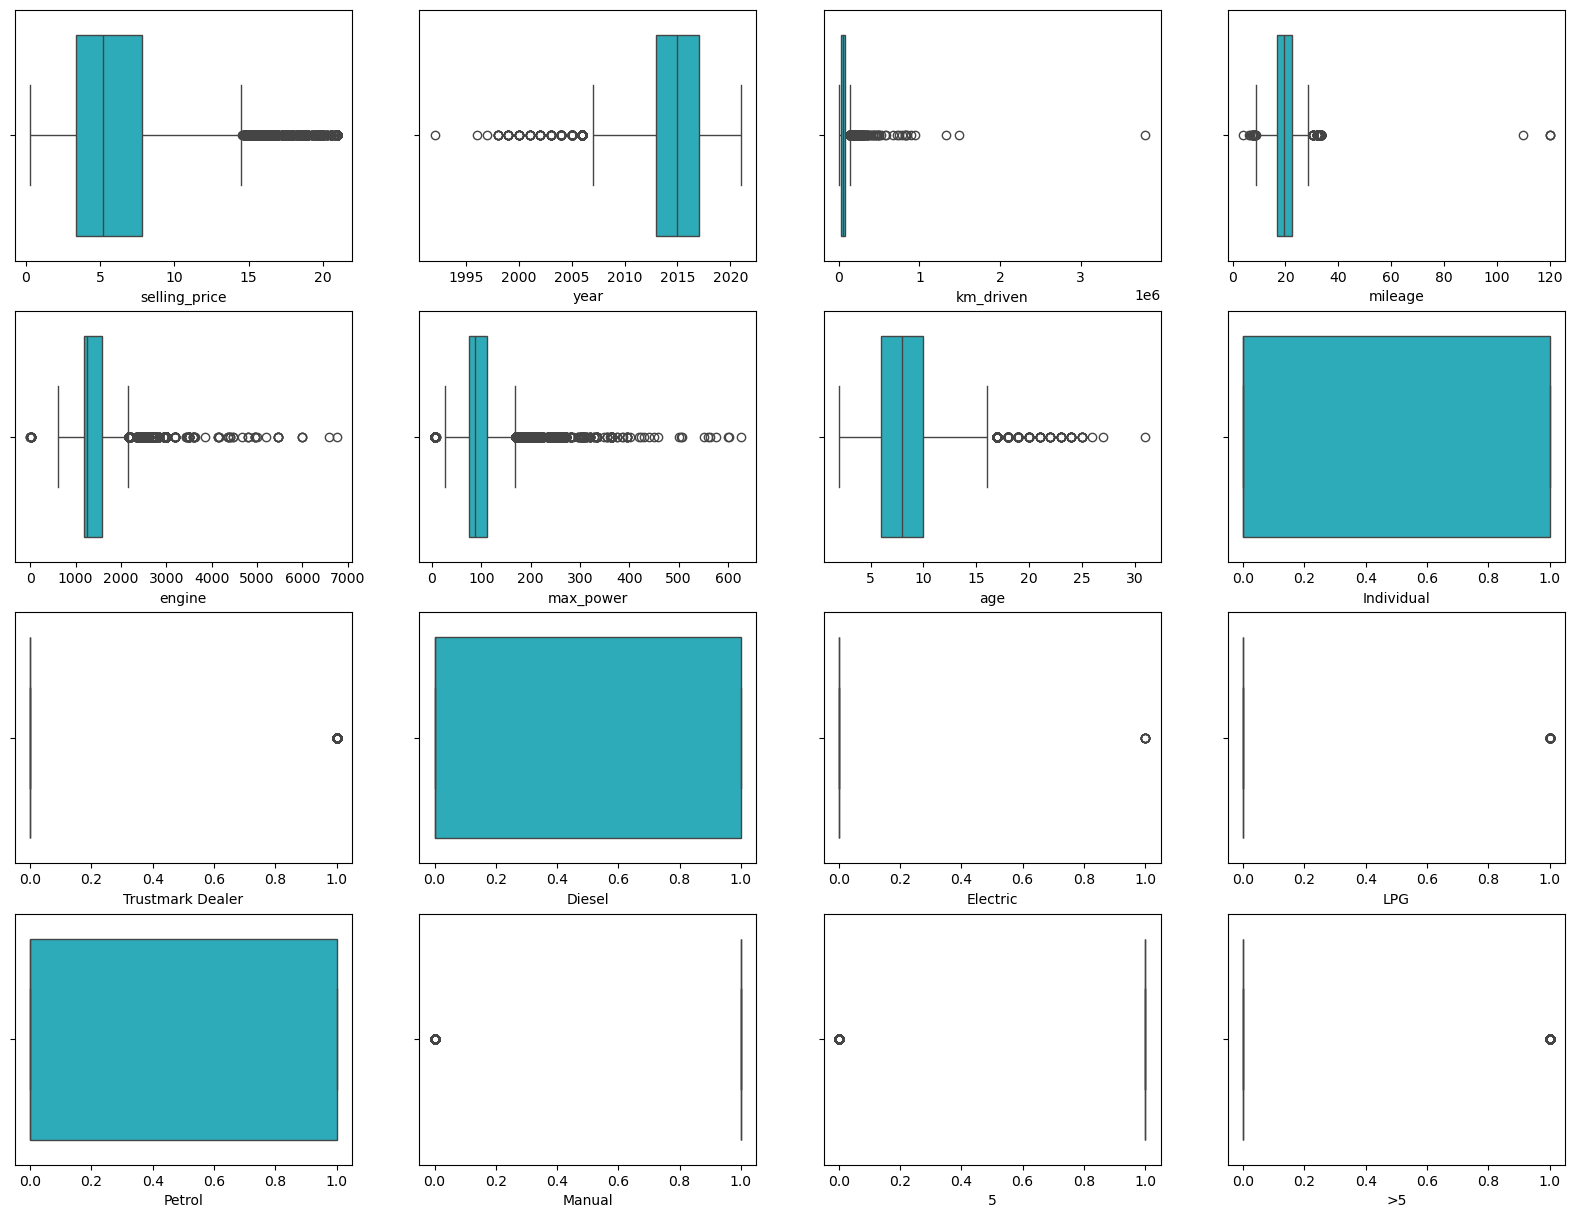

In [19]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df_num.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col], color='C9')
plt.show()

In [20]:
data = df.drop(['selling_price','model','make','Trustmark Dealer','Electric','LPG','Manual','5','>5'], axis=1)

In [21]:
data.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age',
       'Individual', 'Diesel', 'Petrol'],
      dtype='object')

In [22]:
# treatment of outliers 
threshold = 1.5
for colos in data.columns:

    # finding q1, q3 and IQR
    q1 = df[colos].quantile(0.25)
    q3 = df[colos].quantile(0.75)
    IQR = q3 - q1

    # finding upper wisker and lower wisker
    upper_wisker = q3 + threshold * IQR
    lower_wisker = q1 - threshold * IQR

    # capping the outliers
    df[colos] = df[colos].clip(lower=lower_wisker, upper=upper_wisker)

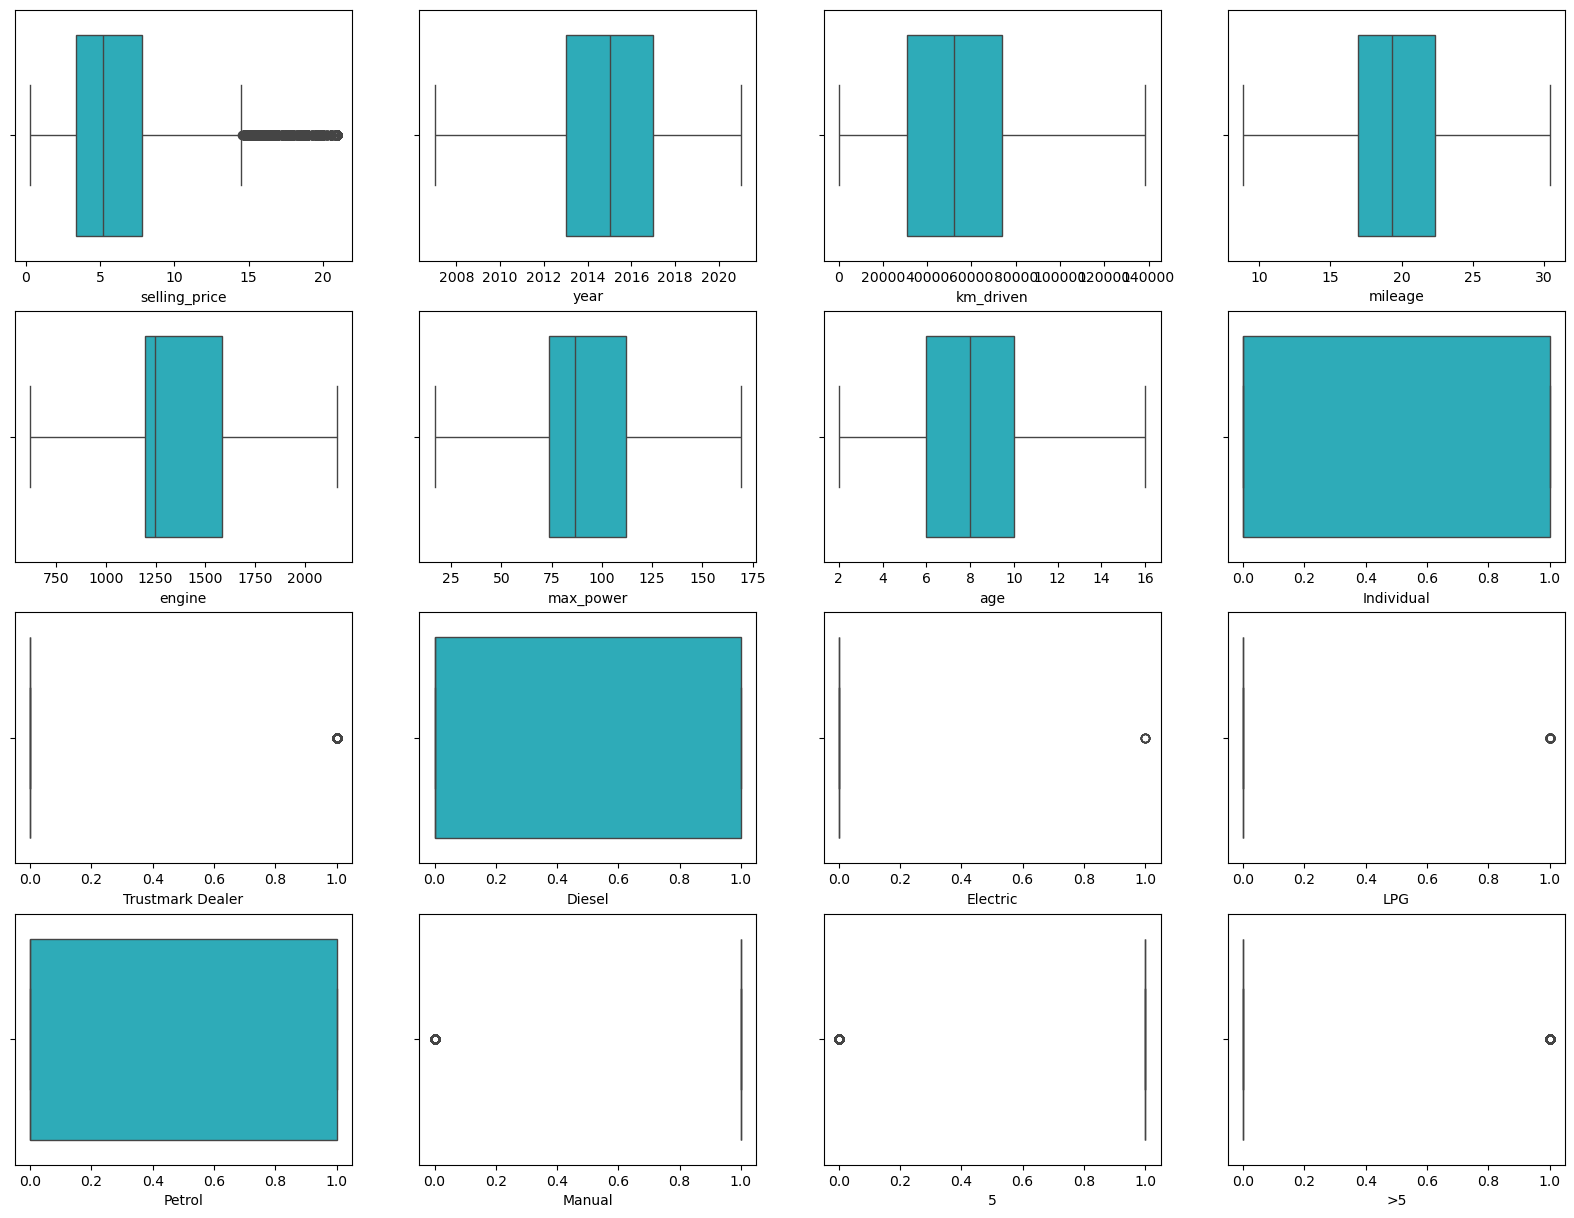

In [23]:
# checking for outliers after treatment
plt.figure(figsize=(20,15))
for i,col in enumerate(df_num.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col], color='C9')
plt.show()

In [24]:
df['make'].unique()

array(['MARUTI', 'HYUNDAI', 'FORD', 'MAHINDRA', 'TATA', 'RENAULT',
       'NISSAN', 'MINI', 'MERCEDES-BENZ', 'TOYOTA', 'FIAT', 'VOLKSWAGEN',
       'HONDA', 'CHEVROLET', 'AMBASSADOR', 'DATSUN', 'KIA', 'BMW',
       'MITSUBISHI', 'AUDI', 'SKODA', 'LAND', 'JAGUAR', 'DAEWOO',
       'BENTLEY', 'MG', 'ISUZU', 'PORSCHE', 'VOLVO', 'LEXUS', 'JEEP',
       'PREMIER', 'MASERATI', 'FORCE', 'LAMBORGHINI', 'FERRARI',
       'OPELCORSA', 'MERCEDES-AMG', 'DC', 'ROLLS-ROYCE', 'OPEL'],
      dtype=object)

In [25]:
df['make'].nunique()

41

In [26]:
df['model'].unique()

array(['ALTO STD', 'GRAND I10 ASTA', 'I20 ASTA', ...,
       'SAFARI 2005-2017 DICOR 2.2 GX 4X2',
       'ECOSPORT 2015-2021 SIGNATURE EDITION PETROL BSIV',
       'YARIS V OPTIONAL CVT BSIV'], dtype=object)

In [27]:
df['model'].nunique()

3233

#### Here, we won't use **OneHotEncoder**  bcz there are too many unique values so, there will be ndim columns
#### That's why we use <b>TargetEncoder</b>

In [29]:
# Columns to encode
categorical_columns = ["make", "model"] 

# Dictionary to store encoded values
target_encodings = {}

for col in categorical_columns:
    encoding = df.groupby(col)["selling_price"].mean().to_dict()  # Target Encoding
    target_encodings[col] = encoding
    df[col] = df[col].map(encoding)

In [30]:
# Save as pickle file
with open("car_encoder.pkl", "wb") as f:
    pickle.dump(target_encodings, f)

In [31]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012,120000,19.70,796.0,46.30,11,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Corelation of the data

In [33]:
df.corr()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
selling_price,1.000000,0.392690,-0.159442,-0.330491,0.657863,0.775655,-0.392690,0.749553,0.968059,-0.201808,-0.019547,0.335236,0.019073,-0.053388,-0.313570,-0.582019,-0.234645,0.223282
year,0.392690,1.000000,-0.474816,0.278571,-0.052076,0.093121,-1.000000,-0.012692,0.332555,-0.006445,0.064815,0.017584,0.004238,-0.076316,-0.016812,-0.108104,-0.007978,0.023971
km_driven,-0.159442,-0.474816,1.000000,-0.109470,0.237125,0.037534,0.474816,0.026295,-0.109520,0.128863,-0.072519,0.359966,-0.002355,0.026234,-0.361884,0.124287,-0.168209,0.191370
mileage,-0.330491,0.278571,-0.109470,1.000000,-0.600181,-0.509480,-0.278571,-0.421907,-0.348007,0.075848,0.026460,0.122054,0.026326,-0.024472,-0.162617,0.287174,0.396826,-0.401206
engine,0.657863,-0.052076,0.237125,-0.600181,1.000000,0.812709,0.052076,0.632361,0.679273,-0.118948,-0.055003,0.517963,0.003566,-0.057660,-0.485200,-0.368405,-0.490361,0.511547
max_power,0.775655,0.093121,0.037534,-0.509480,0.812709,1.000000,-0.093121,0.676487,0.799596,-0.201352,-0.032368,0.314649,-0.002070,-0.063546,-0.278668,-0.530034,-0.248499,0.253614
age,-0.392690,-1.000000,0.474816,-0.278571,0.052076,-0.093121,1.000000,0.012692,-0.332555,0.006445,-0.064815,-0.017584,-0.004238,0.076316,0.016812,0.108104,0.007978,-0.023971
make,0.749553,-0.012692,0.026295,-0.421907,0.632361,0.676487,0.012692,1.000000,0.774284,-0.195263,-0.033878,0.263077,0.012934,-0.027413,-0.244855,-0.552433,-0.147503,0.118870
model,0.968059,0.332555,-0.109520,-0.348007,0.679273,0.799596,-0.332555,0.774284,1.000000,-0.197741,-0.023565,0.346297,0.018631,-0.055150,-0.323890,-0.600678,-0.242382,0.230705
Individual,-0.201808,-0.006445,0.128863,0.075848,-0.118948,-0.201352,0.006445,-0.195263,-0.197741,1.000000,-0.078776,0.014671,-0.005793,0.030982,-0.007934,0.217977,-0.049738,0.056523


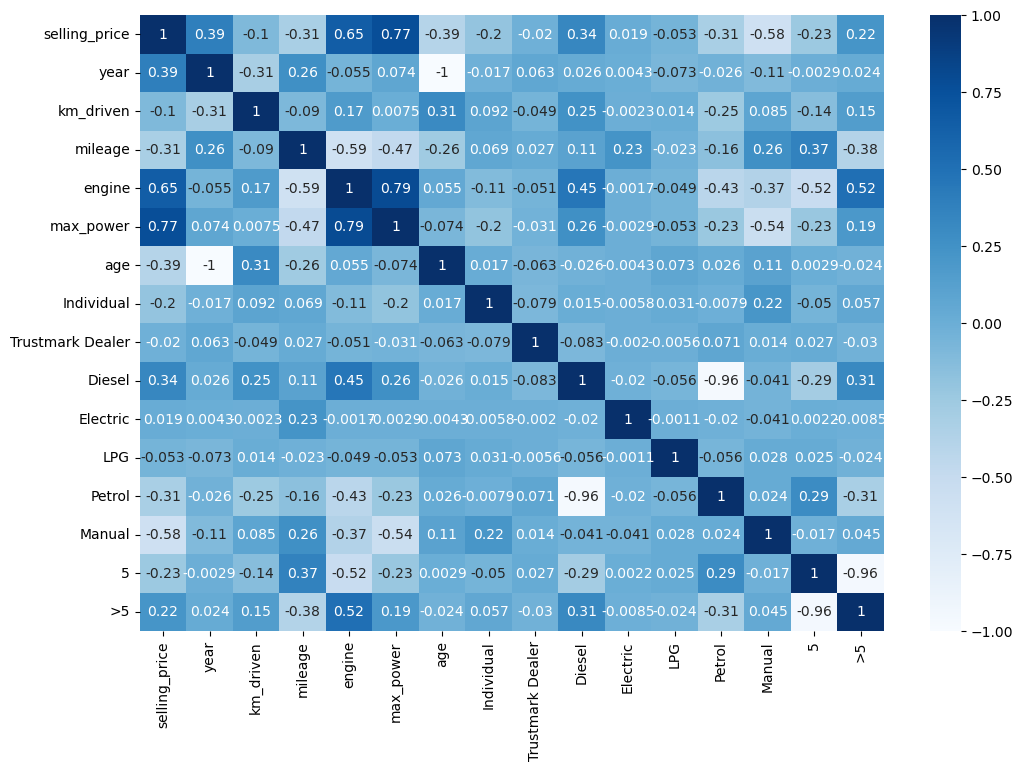

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)
plt.show()

In [35]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012,120000,19.70,796.0,46.30,11,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,5.858258,6.777576,0,0,1,0,0,0,1,1,0


### Divide data into feature columns and target column

In [37]:
x = df.drop('selling_price', axis=1)
y = df['selling_price']

### Split the data into train and test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train.shape, y_train.shape

((15856, 17), (15856,))

In [42]:
x_test.shape, y_test.shape

((3964, 17), (3964,))

### Scale the data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[-0.52450048,  0.74931649,  0.26489961, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-1.50525598,  1.29492642, -0.84474633, ..., -2.01278171,
         0.44338351, -0.42377632],
       [ 1.11009201,  0.56275129,  1.96536374, ...,  0.49682486,
         0.44338351, -0.42377632],
       ...,
       [-0.19758199,  1.43124339, -0.04292164, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.45625501,  0.44872885, -0.41528605, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-0.19758199,  1.06025849, -1.84268295, ...,  0.49682486,
        -2.25538383,  2.35973543]])

In [46]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 0.78317351,  0.74931649,  0.53796684, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.12933651,  0.17407378,  0.16560243, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 0.45625501,  0.48190637,  1.94302188, ...,  0.49682486,
         0.44338351, -0.42377632],
       ...,
       [-1.83217448, -0.18350952, -0.14221881, ...,  0.49682486,
         0.44338351, -0.42377632],
       [-1.50525598, -0.18350952, -0.48975893, ...,  0.49682486,
         0.44338351, -0.42377632],
       [ 1.763929  , -1.27180653,  0.5429317 , ...,  0.49682486,
         0.44338351, -0.42377632]])

In [47]:
# Save Scaler as pickle file
with open("car_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

### Fit the scaled data in dataset

In [49]:
x_train[x_train.columns] = x_train_scaled

In [50]:
x_train

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,-0.524500,0.749316,0.264900,0.436514,0.246005,0.524500,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
4556,-1.505256,1.294926,-0.844746,1.448103,2.165947,1.505256,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
7094,1.110092,0.562751,1.965364,-0.455316,-0.620970,-1.110092,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1441,1.437011,-1.271807,1.084101,-0.580172,-0.328073,-1.437011,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
17079,-2.159093,1.682142,-1.482731,0.948679,1.019254,2.159093,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.129337,-0.743205,0.811034,-1.607051,-1.403006,-0.129337,-0.521072,-0.841076,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
11964,1.110092,-1.615584,0.257452,-1.092337,-0.825998,-1.110092,-0.521072,-0.496024,-0.799289,10.032000,-0.984977,-0.019456,-0.056244,1.026590,-2.012782,0.443384,-0.423776
5390,-0.197582,1.431243,-0.042922,-0.455316,-0.623899,0.197582,-0.521072,-0.488724,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
860,0.456255,0.448729,-0.415286,0.179157,0.647275,-0.456255,-0.163433,0.231497,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [51]:
x_test[x_test.columns] = x_test_scaled
x_test

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
960,0.783174,0.749316,0.537967,0.087426,-0.304641,-0.783174,-0.542630,-0.456837,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
4073,0.129337,0.174074,0.165602,0.181705,-0.187482,-0.129337,-0.284819,-0.330968,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
4339,0.456255,0.481906,1.943022,0.181705,0.099557,-0.456255,-0.163433,-0.206702,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
19325,0.456255,-0.792583,-0.191867,-0.580172,-0.190411,-0.456255,-0.163433,-0.176406,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
438,-0.851419,0.127432,0.359232,-1.092337,-0.823069,0.851419,-0.521072,-0.927358,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12402,-0.524500,-0.867582,-0.018097,-0.582720,-0.246062,0.524500,-0.163433,-0.705864,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
12460,0.129337,0.127432,-2.500527,1.458296,2.165947,-0.129337,3.759722,3.063152,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,-2.012782,0.443384,-0.423776
11335,-1.832174,-0.183510,-0.142219,-0.931808,-0.825998,1.832174,-0.521072,-1.067924,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
13071,-1.505256,-0.183510,-0.489759,-0.585269,-0.275352,1.505256,-0.521072,-0.670769,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


### Modeling

In [53]:
from sklearn.linear_model import LinearRegression
log = LinearRegression()
log.fit(x_train, y_train)

y_pred_train=log.predict(x_train)
y_pred_test=log.predict(x_test)
# Evaluating regression model
from sklearn.metrics import mean_squared_error, r2_score

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R² Score:", r2_score(y_train, y_pred_train))
print("Test R² Score:", r2_score(y_test, y_pred_test))
print()
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
# Training score
print("Accuracy on train data:", log.score(x_train, y_train) * 100)
# Testing score
print("Accuracy on test data:", log.score(x_test, y_test) * 100)

Train MSE: 1.25163592540932
Test MSE: 1.2137913468527886
Train R² Score: 0.9463404066415143
Test R² Score: 0.9497932552663649

Accuracy on train data: 94.63404066415143
Accuracy on test data: 94.97932552663649


In [54]:
round(log.score(x_train, y_train),2)*100

95.0

In [55]:
round(log.score(x_test, y_test),2)*100

95.0

In [56]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=6)  # Regression model
dtr.fit(x_train, y_train)  # Fit the model

y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

# Evaluating regression model
from sklearn.metrics import mean_squared_error, r2_score

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R² Score:", r2_score(y_train, y_pred_train))
print("Test R² Score:", r2_score(y_test, y_pred_test))

y_pred_train=dtr.predict(x_train)
y_pred_test=dtr.predict(x_test)
## Evaluating the model
from sklearn.metrics import accuracy_score
# Training score
print()
print("Accuracy on train data:", dtr.score(x_train, y_train) * 100)
# Testing score
print("Accuracy on test data:", dtr.score(x_test, y_test) * 100)

Train MSE: 1.1707632629917297
Test MSE: 1.394084720982351
Train R² Score: 0.9498075444018234
Test R² Score: 0.9423356774581533

Accuracy on train data: 94.98075444018234
Accuracy on test data: 94.23356774581532


In [57]:
round(dtr.score(x_train, y_train),2)*100

95.0

In [58]:
round(dtr.score(x_test, y_test),2)*100

94.0

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the regression model
rfr = RandomForestRegressor(random_state=42, max_depth=10, n_estimators=100)

# Train the model
rfr.fit(x_train, y_train)

# Predictions
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

# Evaluating the regression model
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R² Score:", r2_score(y_train, y_pred_train))
print("Test R² Score:", r2_score(y_test, y_pred_test))
from sklearn.metrics import accuracy_score
# Training score
print()
print("Accuracy on train data:", rfr.score(x_train, y_train) * 100)
# Testing score
print("Accuracy on test data:", rfr.score(x_test, y_test) * 100)

Train MSE: 0.524302747750084
Test MSE: 0.9198449945171308
Train R² Score: 0.9775223196539315
Test R² Score: 0.9619519261247175

Accuracy on train data: 97.75223196539315
Accuracy on test data: 96.19519261247174


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(x_train, y_train)

# Predictions
y_pred_train = gbr.predict(x_train)
y_pred_test = gbr.predict(x_test)

# Evaluating the model
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R² Score:", r2_score(y_train, y_pred_train))
print("Test R² Score:", r2_score(y_test, y_pred_test))

# R² Score using .score() method
print("\nModel R² Score on Train Data:", gbr.score(x_train, y_train) * 100)
print("Model R² Score on Test Data:", gbr.score(x_test, y_test) * 100)

Train MSE: 0.9346555400545472
Test MSE: 1.023243967450772
Train R² Score: 0.9599298524503591
Test R² Score: 0.9576749753512095

Model R² Score on Train Data: 95.99298524503591
Model R² Score on Test Data: 95.76749753512095


In [61]:
# save the model
with open("cars_price.pkl", "wb") as file:
    pickle.dump(rfr, file)

In [62]:
import joblib

In [63]:
# Load the model
with open('cars_price.pkl', 'rb') as file:
    model = joblib.load(file)

In [64]:
pip show streamlit

Name: streamlit
Version: 1.37.1
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\saura\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [65]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012,120000,19.70,796.0,46.30,11,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016,20000,18.90,1197.0,82.00,7,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010,60000,17.00,1197.0,80.00,13,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012,37000,20.92,998.0,67.10,11,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015,30000,22.77,1498.0,98.59,8,5.858258,6.777576,0,0,1,0,0,0,1,1,0
